In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

First of all let's compute the gradient of a function that we know its gradient. \
$y=x^2$  \
$\frac{dy}{dx}=2x$

In [18]:
X = tf.Variable(3.0)

In [24]:
with tf.GradientTape() as tape:
    y = X**2

grade = tape.gradient(y,X)

In [25]:
grade

<tf.Tensor: shape=(), dtype=float32, numpy=0.6000000238418579>

If it is defined as fixed and unchangeable like below, then this context manager will not work.

In [28]:
X = tf.constant(3.0)

In [31]:
with tf.GradientTape() as tape:
    y = X**2

grade = tape.gradient(y,X)
grade

But if you need to use this model somewhere, you can add the following statement, which means “pay attention to this variable—I intend to work on it and make it mutable.”

In [37]:
X = tf.constant(3.0)

with tf.GradientTape() as ta:
    ta.watch(X)
    y = X**2

grade = ta.gradient(y,X)
grade

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [38]:
X = tf.linspace(-10, 10 ,201)

with tf.GradientTape() as ta :
    ta.watch(X)
    y = tf.sigmoid(X)

dy_dx = ta.gradient(y,X)

In [41]:
dy_dx
X

<tf.Tensor: shape=(201,), dtype=float64, numpy=
array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,
        -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,
        -7.3,  -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,
        -6.4,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,
        -5.5,  -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,
        -4.6,  -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,
        -3.7,  -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,
        -2.8,  -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,
        -1.9,  -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,
        -1. ,  -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,
        -0.1,   0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,
         0.8,   0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,
         1.7,   1.8,   1.9,   2. ,   2.1, 

<function matplotlib.pyplot.show(close=None, block=None)>

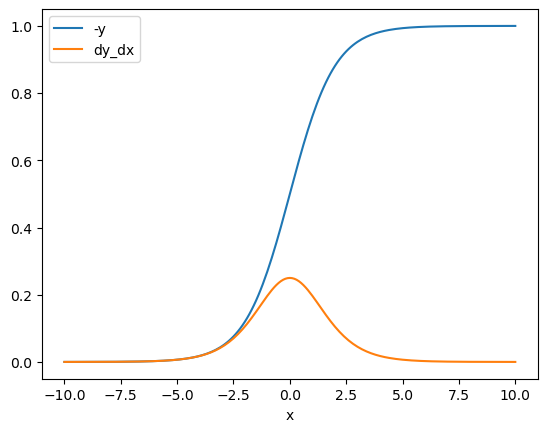

In [49]:
plt.plot(X,y,label = '-y')
plt.plot(X,dy_dx,label = 'dy_dx')
plt.legend()
_ = plt.xlabel('x')
plt.show

In [65]:
w = tf.Variable(tf.random.normal((3,2)),name= 'w')
b = tf.Variable(tf.zeros((2,2),dtype = tf.float32),name= 'b' )
x = [[3.,5.,6.]]
with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)
    
[dloss_dw, dloss_db] = tape.gradient(loss,[w,b])

In [66]:
dloss_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[  5.8156505, -32.630913 ],
       [  9.692751 , -54.384857 ],
       [ 11.631301 , -65.261826 ]], dtype=float32)>

In [67]:
dloss_db

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.96927506, -5.4384856 ],
       [ 0.96927506, -5.4384856 ]], dtype=float32)>

In [68]:
x = tf.constant([1.,3.])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x*x
    z = y*y
    
print(tape.gradient(y,x).numpy())
print(tape.gradient(z,x).numpy())

[2. 6.]
[  4. 108.]


In [10]:
w = tf.random.normal( shape=(3,2),dtype=tf.float32)
b = tf.zeros(shape = (2,2), dtype=tf.float32)
x = [[3.0,2.0,5.0]]

with tf.GradientTape() as tape:
    tape.watch([w,b])
    y = x@w + b
    loss = tf.reduce_mean(y**2)

dloss_w , dloss_b = tape.gradient(loss,[w,b])

In [15]:
dloss_w

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 14.085168, -17.578655],
       [  9.390112, -11.719104],
       [ 23.47528 , -29.29776 ]], dtype=float32)>

In [16]:
w = tf.Variable(tf.random.normal( shape=(3,2),dtype=tf.float32))
b = tf.Variable(tf.zeros(shape = (2,2), dtype=tf.float32))
x = [[3.0,2.0,5.0]]

with tf.GradientTape() as tape:
    y = x@w + b
    loss = tf.reduce_mean(y**2)

dloss_w , dloss_b = tape.gradient(loss,[w,b])

In [17]:
dloss_w

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[10.378531,  9.392876],
       [ 6.919021,  6.261917],
       [17.297552, 15.654793]], dtype=float32)>